<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/Electric_Vehicles_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

In [18]:
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [21]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
train['연식(년)'].unique(), train['보증기간(년)'].unique()

(array([2, 0, 1]), array([ 0,  6,  7,  3,  1,  5,  8, 10,  2,  4,  9]))

In [ ]:
train.head() #Nearly New 거의 안쓴 중고, brand_new 새상품, per-owned 중고

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


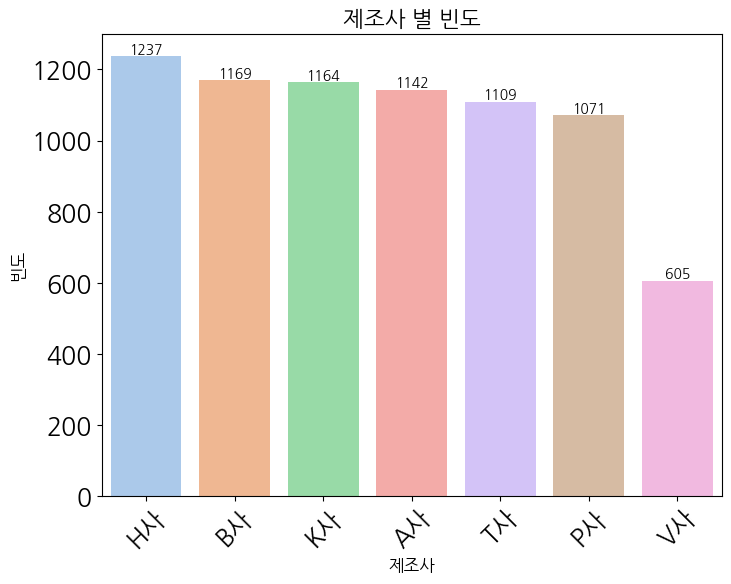

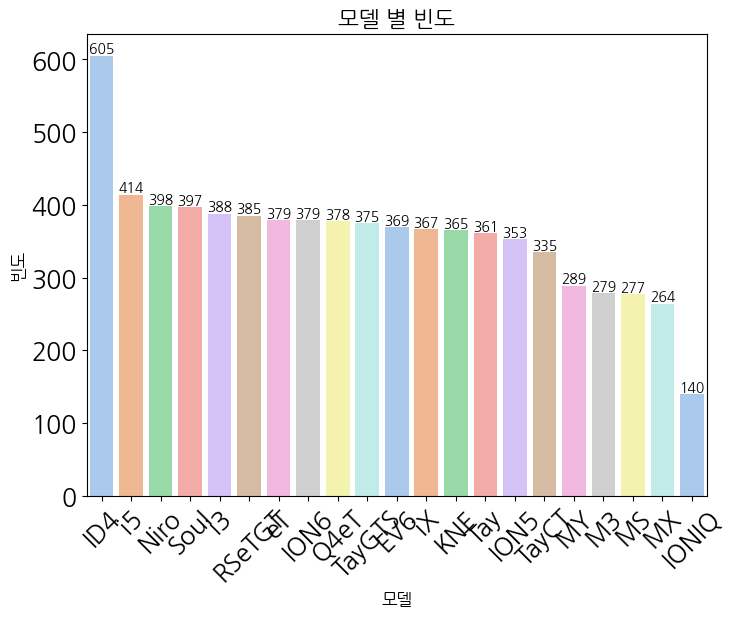

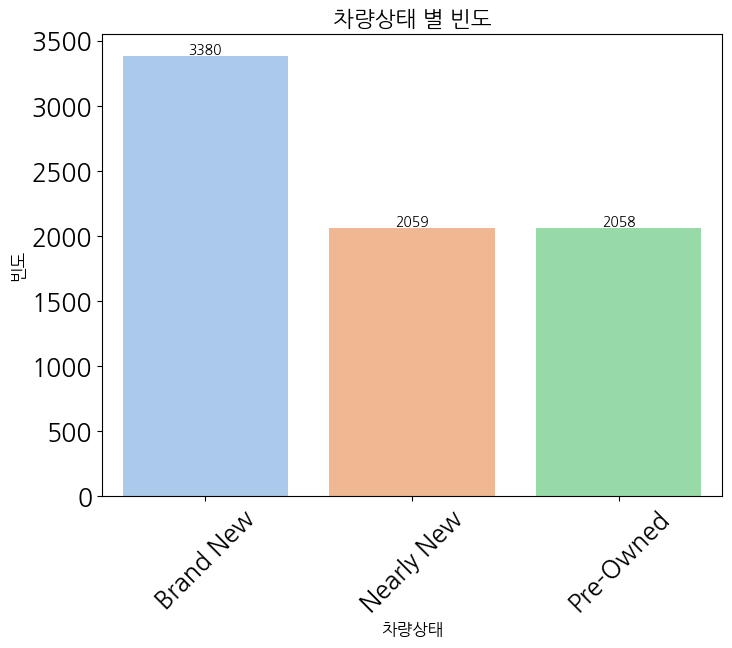

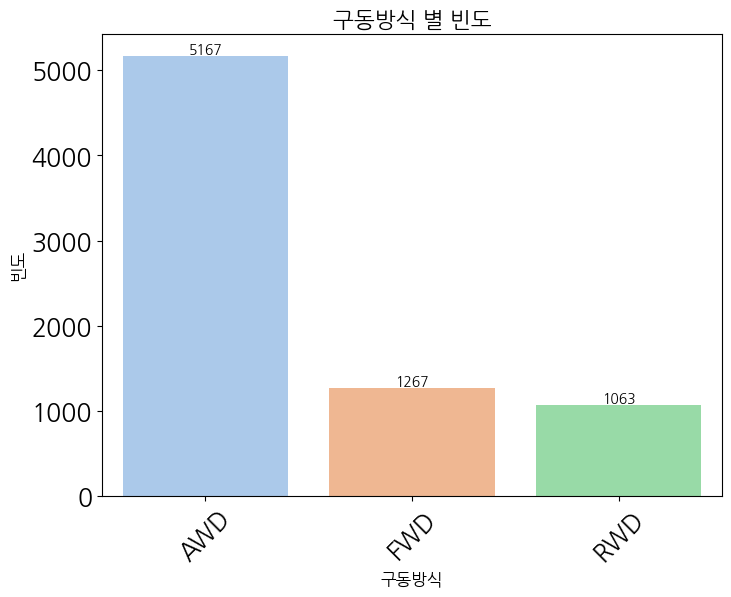

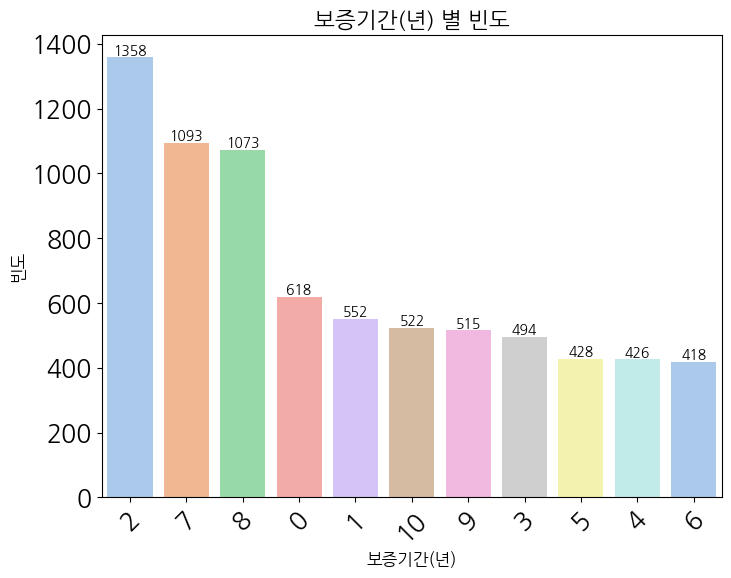

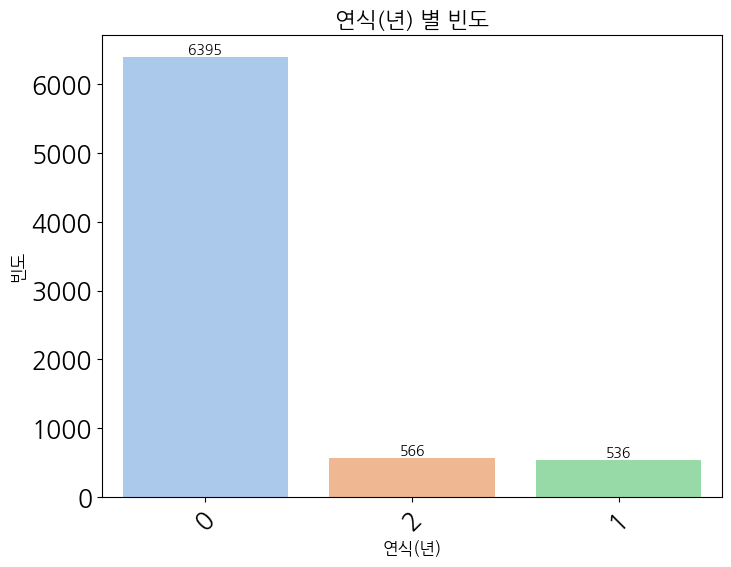

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 생성 함수
def plot_countplot(data, column, figsize=(8, 6), palette='pastel'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=column, palette=palette, order=data[column].value_counts().index)

    # 막대 위에 값 표시
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'{column} 별 빈도', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# 각 컬럼에 대해 그래프 생성
columns_to_plot = ['제조사', '모델', '차량상태', '구동방식', '보증기간(년)', '연식(년)']
for col in columns_to_plot:
    plot_countplot(train, col)

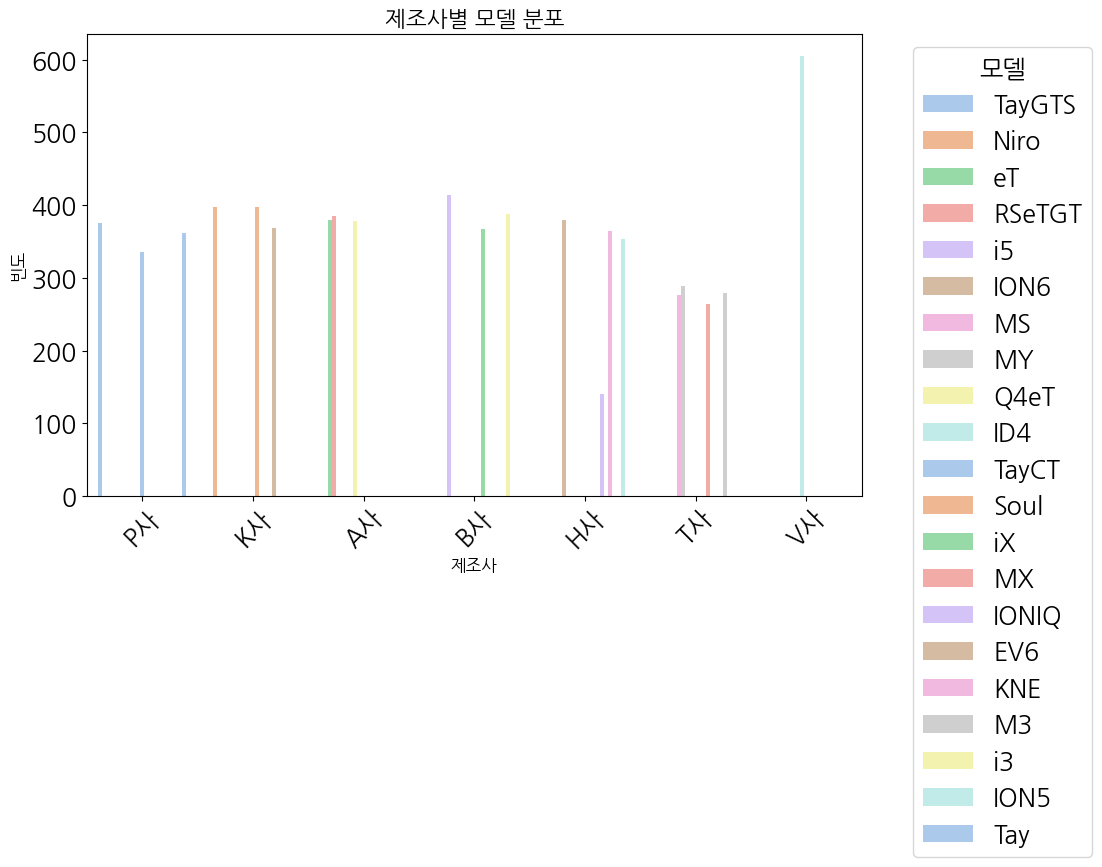

In [23]:
# 제조사별 모델 분포를 시각화 (countplot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='제조사', hue='모델', palette='pastel')

# 그래프 제목과 축 레이블 설정
plt.title('제조사별 모델 분포', fontsize=16)
plt.xlabel('제조사', fontsize=12)
plt.ylabel('빈도', fontsize=12)

# 범례 표시
plt.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [28]:
nan_counts = train['배터리용량'].isna().groupby(train['모델']).sum().reset_index(name='NaN_개수')

manufacturer_model_df = (
    train.groupby(['제조사', '모델'])
    .size()
    .reset_index(name='모델_개수')
    .merge(nan_counts, on='모델', how='left')
)

# 제조사별 내림차순 및 모델 개수별 내림차순으로 정렬
manufacturer_model_df = manufacturer_model_df.sort_values(
    by=['제조사', '모델_개수'],
    ascending=[True, False]
).reset_index(drop=True)

In [29]:
manufacturer_model_df

,제조사,모델,모델_개수,NaN_개수
0,A사,RSeTGT,385,282
1,A사,eT,379,51
2,A사,Q4eT,378,150
3,B사,i5,414,79
4,B사,i3,388,61
5,B사,iX,367,291
6,H사,ION6,379,144
7,H사,KNE,365,122
8,H사,ION5,353,133
9,H사,IONIQ,140,32


In [ ]:
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [31]:
train.select_dtypes(exclude='object').corr()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


In [ ]:
# object_col = df.drop('ID', axis=1).select_dtypes('object')
# for i in list(object_col.columns):
#     print(f'train {i} : {sorted(train[i].unique())}')
#     print(f'test {i} : {sorted(test[i].unique())}')
#     print('')